## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import numpy as np
import pandas as pd
kchouse = pd.read_csv('data/kc_house_data.csv')
kchouse.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
kchouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
kc_new = kchouse.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)
kc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  float64
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


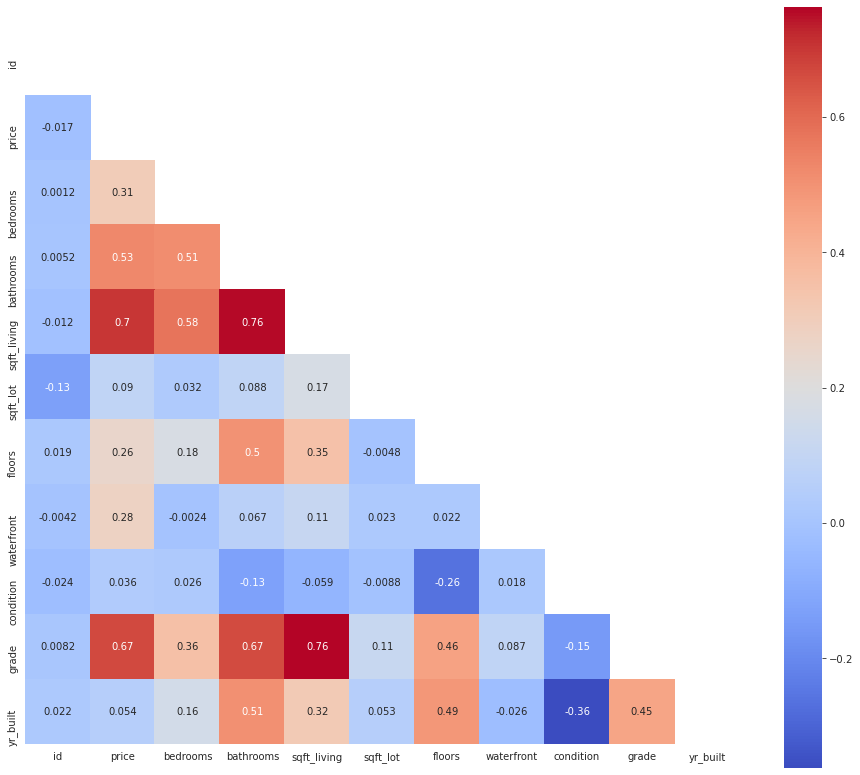

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = kc_new.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(16, 14))

    ax = sns.heatmap(corr, mask=mask, square=True, annot = True, cmap = 'coolwarm')

In [6]:
df = kc_new.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [7]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(grade, sqft_living)",0.762779
"(sqft_living, bathrooms)",0.755758


In [9]:
#decision if/which column to drop
kc_new.describe().astype(str)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21597.0,21597.0,21597.0
mean,4580474287.770987,540296.5735055795,3.3731999814789093,2.1158262721674306,2080.3218502569803,15099.408760475992,1.4940964022780943,0.007595858696217679,3.4098254387183404,7.657915451220076,1970.9996758809093
std,2876735715.74778,367368.1401013945,0.9262988945421479,0.7689842966527209,918.1061250800805,41412.636875502074,0.5396827909775457,0.08682484570054606,0.6505456356725546,1.1731996637760254,29.375234132441644
min,1000102.0,78000.0,1.0,0.5,370.0,520.0,1.0,0.0,1.0,3.0,1900.0
25%,2123049175.0,322000.0,3.0,1.75,1430.0,5040.0,1.0,0.0,3.0,7.0,1951.0
50%,3904930410.0,450000.0,3.0,2.25,1910.0,7618.0,1.5,0.0,3.0,7.0,1975.0
75%,7308900490.0,645000.0,4.0,2.5,2550.0,10685.0,2.0,0.0,4.0,8.0,1997.0
max,9900000190.0,7700000.0,33.0,8.0,13540.0,1651359.0,3.5,1.0,5.0,13.0,2015.0


In [ ]:
#some notes: # Mean price is $540,296.57 
             # std $367368.14
             # min $78,000.0 
             # 25% $322,000.0
             # 50% $450,000.0,
             # 75% $645000.0
             # max $7,700,000.0

In [8]:
kc_new.isna().value_counts()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  condition  grade  yr_built
False  False  False     False      False        False     False   False       False      False  False       19221
                                                                  True        False      False  False        2376
dtype: int64

array([[<AxesSubplot:xlabel='id', ylabel='id'>,
        <AxesSubplot:xlabel='price', ylabel='id'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='id'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='id'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='id'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='id'>,
        <AxesSubplot:xlabel='floors', ylabel='id'>,
        <AxesSubplot:xlabel='waterfront', ylabel='id'>,
        <AxesSubplot:xlabel='condition', ylabel='id'>,
        <AxesSubplot:xlabel='grade', ylabel='id'>,
        <AxesSubplot:xlabel='yr_built', ylabel='id'>],
       [<AxesSubplot:xlabel='id', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='price'>,
        <AxesSubplot:xlabel='floors', ylabel='price'>,
        <AxesSubplot

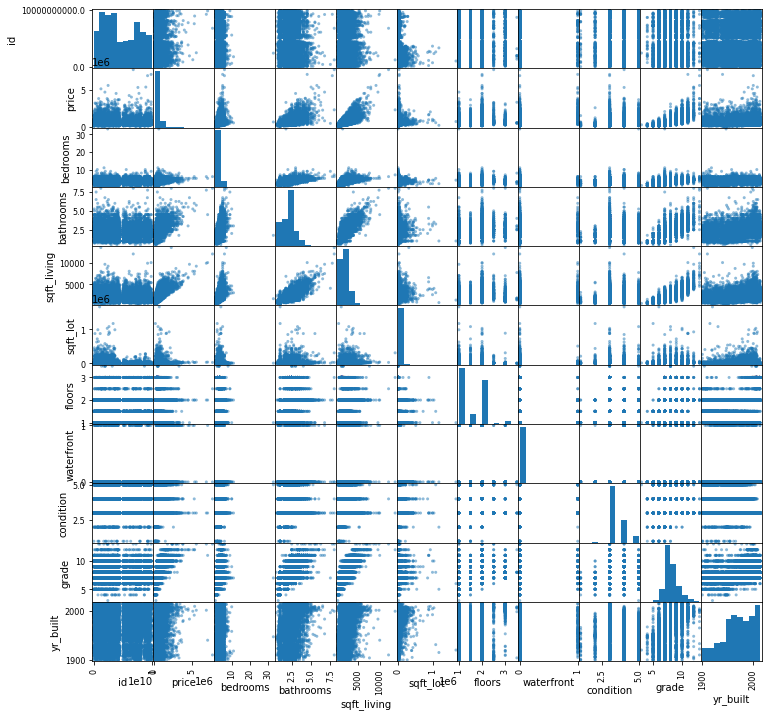

In [10]:
pd.plotting.scatter_matrix(kc_new, figsize=[12,12])

In [44]:
continuous = ['price', 'bedrooms', 'sqft_lot', 'sqft_living', 'bathrooms']
categoricals = ['waterfront', 'condition', 'grade',  'yr_built', 'floors']
kccat = kc_new[categoricals]
kccon = kc_new[continuous]

In [45]:
kccat = kccat.set_index(kc_new['id'])
kccon = kccon.set_index(kc_new['id'])

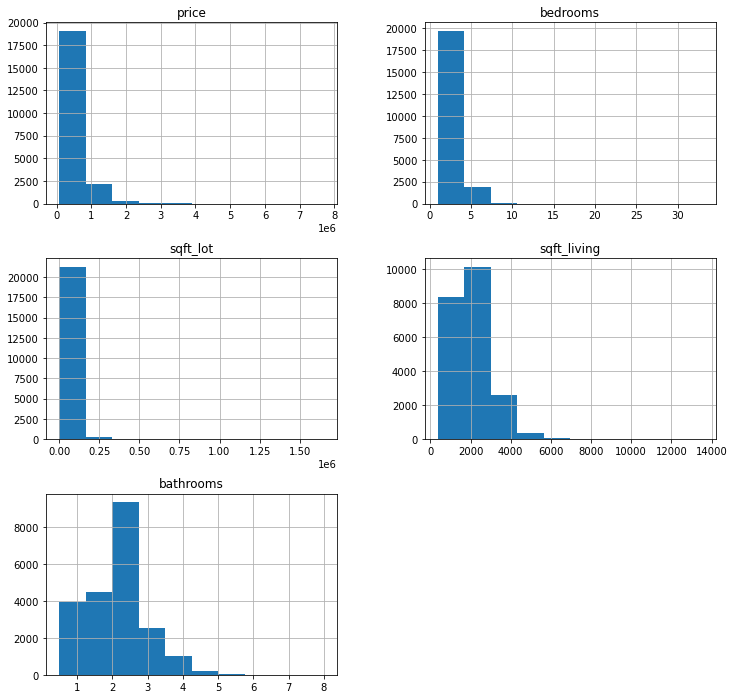

In [13]:
kccon.hist(figsize = [12,12]);

In [135]:
#### doing an initial model just for funsies ####
outcome = 'price'
predictors = kc_new.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=kc_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     3559.
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:44:02   Log-Likelihood:            -2.6375e+05
No. Observations:               19221   AIC:                         5.275e+05
Df Residuals:                   19210   BIC:                         5.276e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.711e+06   1.39e+05     48.398      0.000    6.44e+06    6.98e+06
id          -1.523e-06   5.58e-07     -2.729      0.006   -2.62e-06   -4.29e-07
bedrooms     -4.36e+04   2185.633    -19.949      0.000   -4.79e+04   -3.93e+04
bathrooms    5.053e+04   3697.868     13.665      0.000    4.33e+04    5.78e+04
sqft_living   182.0284      3.517     51.751      0.000     175.134     188.923
sqft_lot       -0.2862      0.040     -7.108      0.000      -0.365      -0.207
floors       2.195e+04   3698.938      5.935      0.000    1.47e+04    2.92e+04
waterfront   7.514e+05   1.85e+04     40.535      0.000    7.15e+05    7.88e+05
condition    1.902e+04   2659.979      7.150      0.000    1.38e+04    2.42e+04
grade        1.286e+05   2298.592     55.936      0.000    1.24e+05    1.33e+05
yr_built    -3848.4916     71.316    -53.964      0.000   -3988.278   -3708.706
==============================================================================
Omnibus:                    14320.989   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           965026.170
Skew:                           2.988   Prob(JB):                         0.00
Kurtosis:                      37.194   Cond. No.                     4.73e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# log and normalize features
log_names = [f'{column}_log' for column in kccon.columns]

kccon_log = np.log(kccon)
kccon_log.columns = log_names

log_names

['price_log',
 'bedrooms_log',
 'sqft_lot_log',
 'sqft_living_log',
 'bathrooms_log']

In [97]:
kccon_log

,price_log,bedrooms_log,sqft_lot_log,sqft_living_log,bathrooms_log
id,,,,,
7129300520,12.309982,1.098612,8.639411,7.073270,0.000000
6414100192,13.195614,1.098612,8.887653,7.851661,0.810930
5631500400,12.100712,0.693147,9.210340,6.646391,0.000000
2487200875,13.311329,1.386294,8.517193,7.580700,1.098612
1954400510,13.142166,1.098612,8.997147,7.426549,0.693147
...,...,...,...,...,...
263000018,12.793859,1.098612,7.030857,7.333023,0.916291
6600060120,12.899220,1.386294,8.667852,7.745003,0.916291
1523300141,12.904459,0.693147,7.207860,6.927558,-0.287682


In [98]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

kc_log_norm = kccon_log.apply(normalize)

array([[<AxesSubplot:title={'center':'price_log'}>,
        <AxesSubplot:title={'center':'bedrooms_log'}>],
       [<AxesSubplot:title={'center':'sqft_lot_log'}>,
        <AxesSubplot:title={'center':'sqft_living_log'}>],
       [<AxesSubplot:title={'center':'bathrooms_log'}>, <AxesSubplot:>]],
      dtype=object)

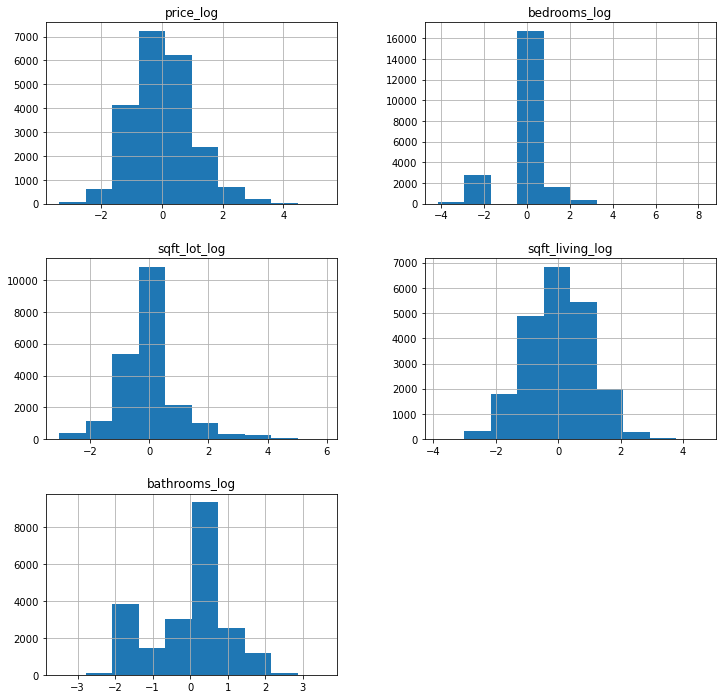

In [99]:
kc_log_norm.hist(figsize = [12,12])

In [ ]:
### check features with statsmodels ###

# OLS with Statsmodels #

In [136]:
from statsmodels.formula.api import ols
import scipy.stats as stats
X_train = kc_log_norm.drop(['price_log'], axis = 1)
y_train = kc_log_norm['price_log']

X_test = kc_log_norm.drop(['price_log'], axis = 1)
y_test = kc_log_norm['price_log']

In [137]:
Y = y_train
X = X_train
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

### OLS Regression Results for continuous variables ####

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     4957.
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:45:12   Log-Likelihood:                -23610.
No. Observations:               21597   AIC:                         4.723e+04
Df Residuals:                   21592   BIC:                         4.727e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.343e-15      0.005   2.73e-13      1.000      -0.010       0.010
bedrooms_log       -0.1652      0.006    -25.509      0.000      -0.178      -0.152
sqft_lot_log       -0.0950      0.005    -17.630      0.000      -0.106      -0.084
sqft_living_log     0.8161      0.009     89.957      0.000       0.798       0.834
bathrooms_log      -0.0043      0.008     -0.551      0.582      -0.020       0.011
==============================================================================
Omnibus:                       73.088   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.300
Skew:                           0.130   Prob(JB):                     2.00e-16
Kurtosis:                       2.887   Cond. No.                         3.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
### scikit linear regression with test/train ####

ValueError: Found input variables with inconsistent numbers of samples: [21597, 16197]

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit, cross_validate

baseline_model = LinearRegression()
X_train = X_train
splitter = ShuffleSplit(n_splits=3, test_size=0.20, random_state=0)

model_scores = cross_validate(
    estimator=baseline_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", model_scores["train_score"].mean())
print("Validation score:", model_scores["test_score"].mean())


Current Model
Train score:      0.4754060870462564
Validation score: 0.4896337077335941


In [140]:
significant_features = ["sqft_lot_log", 'sqft_living_log', 'bedrooms_log']

splitter = ShuffleSplit(n_splits=3, test_size=0.20, random_state=0)
baseline_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[significant_features],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())


Current Model
Train score:      0.47538509720100564
Validation score: 0.48969741833058195


In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [110]:
X = X_train
x_cols = ['bedrooms_log', 'sqft_lot_log', 'sqft_living_log', 'bathrooms_log']
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms_log', 1.7362332344304592),
 ('sqft_lot_log', 1.2039936970449476),
 ('sqft_living_log', 3.4092254287109243),
 ('bathrooms_log', 2.5709790704547126)]

In [ ]:
#### in the end, there is no significant difference between the Rsquared
#### values with or without bathroom #

# ------------ Categorical -------------- #

In [ ]:
kccat.hist(figsize = [12,12])

In [ ]:
kccat.info()

In [ ]:
#turn the n/a columns into 0's because it esssentially means the same thing,
#

In [ ]:
kccat['waterfront'].value_counts()

In [ ]:
kccat['waterfront'].isnull().value_counts()


In [115]:
kccat['waterfront'] = kccat['waterfront'].fillna(0.0)

In [116]:
kccat['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

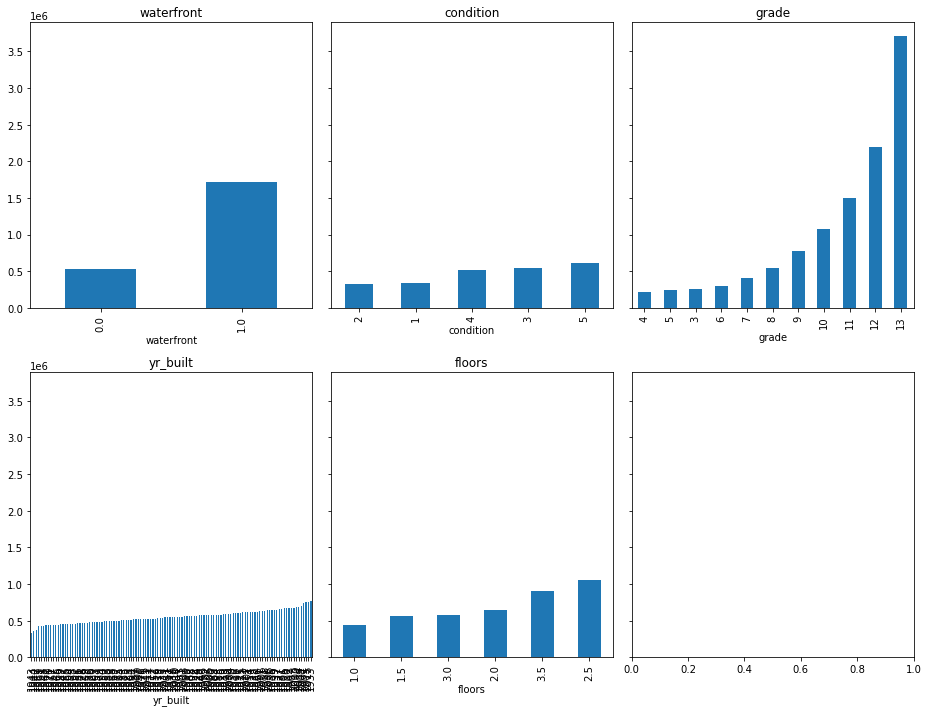

In [118]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13,10), sharey=True)

categoricals = ['waterfront', 'condition', 'grade',  'yr_built', 'floors']

for col, ax in zip(categoricals, axes.flatten()):
    (kc_new.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

In [ ]:
kccat['condition'] = kccat['condition'].astype(str)
kccat['waterfront'] = kccat['waterfront'].astype(str)
kccat['grade'] = kccat['grade'].astype(str)
kccat['floors'] = kccat['floors'].astype(str)
kccat['yr_built'] = kccat['yr_built'].astype(str)

In [119]:
condition_ohe = pd.get_dummies(kccat['condition'], prefix = 'condition', drop_first=True)
waterfront_ohe =pd.get_dummies(kccat['waterfront'], prefix = 'waterfront', drop_first=True)
grade_ohe= pd.get_dummies(kccat['grade'], prefix = 'grade', drop_first=True)
floors_ohe = pd.get_dummies(kccat['floors'], prefix = 'floors', drop_first=True)
yr_ohe = pd.get_dummies(kccat['yr_built'], prefix = 'yr_built', drop_first=True)

In [120]:
ohe_concat = pd.concat([condition_ohe, waterfront_ohe, grade_ohe, floors_ohe, yr_ohe], axis = 1)


In [ ]:
preprocessed = pd.concat([kc_log_norm, ohe_concat], axis=1)

In [126]:
preprocessed.columns = preprocessed.columns.str.replace('.','_')

In [125]:
colnames = preprocessed.columns

In [ ]:
X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(len(X_train), len(X_test), len(y_train), len(y_test))

In [145]:
outcome = 'price_log'
predictors = preprocessed.drop('price_log', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=preprocessed).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     307.2
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:53:38   Log-Likelihood:                -18816.
No. Observations:               21597   AIC:                         3.791e+04
Df Residuals:                   21457   BIC:                         3.903e+04
Df Model:                         139                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1624      0.597     -0.272      0.785      -1.332       1.007
bedrooms_log       -0.0661      0.006    -11.805      0.000      -0.077      -0.055
sqft_lot_log       -0.0312      0.005     -6.011      0.000      -0.041      -0.021
sqft_living_log     0.3681      0.009     41.321      0.000       0.351       0.386
bathrooms_log       0.1082      0.007     14.598      0.000       0.094       0.123
condition_2        -0.0587      0.118     -0.499      0.618      -0.289       0.172
condition_3         0.2350      0.109      2.147      0.032       0.021       0.450
condition_4         0.3035      0.109      2.772      0.006       0.089       0.518
condition_5         0.3915      0.110      3.556      0.000       0.176       0.607
waterfront_1_0      1.0424      0.049     21.264      0.000       0.946       1.139
grade_4            -0.5004      0.594     -0.842      0.400      -1.665       0.664
grade_5            -0.4881      0.585     -0.835      0.404      -1.634       0.658
grade_6            -0.1541      0.584     -0.264      0.792      -1.298       0.990
grade_7             0.3213      0.584      0.550      0.582      -0.823       1.465
grade_8             0.7655      0.584      1.311      0.190      -0.379       1.910
grade_9             1.2624      0.584      2.161      0.031       0.117       2.407
grade_10            1.6938      0.584      2.899      0.004       0.548       2.839
grade_11            2.1213      0.585      3.626      0.000       0.975       3.268
grade_12            2.5978      0.588      4.420      0.000       1.446       3.750
grade_13            3.2097      0.607      5.291      0.000       2.021       4.399
floors_1_5         -0.0080      0.017     -0.481      0.631      -0.040       0.025
floors_2_0         -0.0059      0.013     -0.451      0.652      -0.032       0.020
floors_2_5          0.0219      0.048      0.456      0.648      -0.072       0.116
floors_3_0          0.2575      0.029      8.994      0.000       0.201       0.314
floors_3_5          0.2402      0.221      1.089      0.276      -0.192       0.673
yr_built_1901      -0.0045      0.125     -0.036      0.971      -0.249       0.240
yr_built_1902      -0.0643      0.128     -0.502      0.615      -0.315       0.187
yr_built_1903      -0.1768      0.106     -1.670      0.095      -0.384       0.031
yr_built_1904       0.0289      0.107      0.271      0.786      -0.180       0.238
yr_built_1905      -0.0289      0.092     -0.314      0.753      -0.209       0.151
yr_built_1906       0.0743      0.087      0.855      0.393      -0.096       0.245
yr_built_1907       0.0127      0.095      0.133      0.894      -0.174       0.199
yr_built_1908      -0.1556      0.088     -1.762      0.078      -0.329       0.018
yr_built_1909      -0.0065      0.086     -0.075      0.940

In [ ]:
### Notes: Rsquared is .666, adj is .663, Cond. No. is 778, 

In [146]:
splitter = ShuffleSplit(n_splits=3, test_size=0.20, random_state=0)
baseline_model = LinearRegression()

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4754060870462564
Validation score: 0.4896337077335941


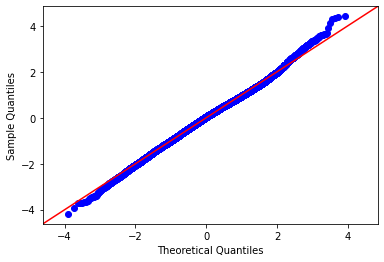

In [130]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [131]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [132]:
X = X_train
y = y_train

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  grade_10                       with p-value 0.0
Add  grade_9                        with p-value 0.0
Add  bathrooms_log                  with p-value 0.0
Add  sqft_living_log                with p-value 0.0
Add  grade_11                       with p-value 6.82166e-160
Add  grade_8                        with p-value 4.23327e-106
Add  grade_12                       with p-value 2.81062e-129
Add  floors_1.5                     with p-value 1.12621e-84
Drop bathrooms_log                  with p-value 0.789823
Add  waterfront_1.0                 with p-value 6.16912e-78
Add  condition_5                    with p-value 3.03448e-66
Add  sqft_lot_log                   with p-value 6.31249e-60
Add  floors_2.0                     with p-value 1.67824e-48
Add  grade_7                        with p-value 2.49414e-47
Add  grade_13                       with p-value 2.06723e-57
Add  bedrooms_log                   with p-value 1.00116e-36
Add  condition_4                    with p-value 1.12028

In [134]:
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     335.7
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:40:34   Log-Likelihood:                -14311.
No. Observations:               16197   AIC:                         2.881e+04
Df Residuals:                   16104   BIC:                         2.952e+04
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.1835      0.052    -22.740      0.000      -1.286      -1.082
grade_10            1.8112      0.033     55.017      0.000       1.747       1.876
grade_9             1.3794      0.027     50.768      0.000       1.326       1.433
sqft_living_log     0.3756      0.010     36.537      0.000       0.355       0.396
grade_11            2.2218      0.045     49.486      0.000       2.134       2.310
grade_8             0.9004      0.022     40.284      0.000       0.857       0.944
grade_12            2.6665      0.078     34.342      0.000       2.514       2.819
waterfront_1.0      1.0831      0.058     18.619      0.000       0.969       1.197
condition_5         0.4550      0.052      8.831      0.000       0.354       0.556
sqft_lot_log       -0.0275      0.006     -4.790      0.000      -0.039      -0.016
floors_2.0         -0.0747      0.013     -5.689      0.000      -0.100      -0.049
grade_7             0.4641      0.019     24.663      0.000       0.427       0.501
grade_13            3.1909      0.190     16.802      0.000       2.819       3.563
bedrooms_log       -0.0571      0.006     -8.961      0.000      -0.070      -0.045
condition_4         0.3463      0.049      7.004      0.000       0.249       0.443
yr_built_1978      -0.2115      0.035     -6.028      0.000      -0.280      -0.143
yr_built_1990      -0.3234      0.039     -8.307      0.000      -0.400      -0.247
yr_built_1924       0.8793      0.059     14.948      0.000       0.764       0.995
yr_built_1906       0.9435      0.072     13.103      0.000       0.802       1.085
yr_built_1926       0.7639      0.051     14.923      0.000       0.664       0.864
yr_built_1910       0.8133      0.060     13.485      0.000       0.695       0.931
yr_built_1951       0.5683      0.046     12.383      0.000       0.478       0.658
yr_built_1923       0.8615      0.073     11.879      0.000       0.719       1.004
yr_built_1909       0.7990      0.070     11.348      0.000       0.661       0.937
yr_built_1946       0.7208      0.061     11.909      0.000       0.602       0.839
yr_built_1907       0.8878      0.083     10.724      0.000       0.726       1.050
yr_built_1925       0.7152      0.055     13.105      0.000       0.608       0.822
yr_built_1927       0.7681      0.060     12.706      0.000       0.650       0.887
yr_built_1940       0.6431      0.055     11.618      0.000       0.535       0.752
yr_built_1941       0.6483      0.055     11.831      0.000       0.541       0.756
yr_built_1947       0.5549      0.043     12.893      0.000       0.471       0.639
yr_built_1919       0.7808      0.076     10.280      0.000       0.632       0.930
yr_built_1921       0.7583      0.078      9.672      0.000       0.605       0.912
yr_built_1929       0.6982      0.064     10.849      0.000

In [ ]:
splitter = ShuffleSplit(n_splits=3, test_size=0.20, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_fin,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

# Stepwise Feature Selection with Scikit #

In [ ]:
from sklearn.feature_selection import RFE

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 50)
selector = selector.fit(X, y.values.ravel()) # convert y to 1d np array to prevent DataConversionWarning
selector.support_ 

In [ ]:
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)

In [ ]:
yhat = linreg.predict(X[selected_columns])

In [ ]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)

In [ ]:
r_squared

In [ ]:
adjusted_r_squared